In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
print(mnist)

{'DESCR': 'mldata.org dataset: mnist-original', 'COL_NAMES': ['label', 'data'], 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.]), 'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


In [2]:
x, y = mnist['data'], mnist['target']
print(x.shape) # 70000 images, each image has 784 features
print(y.shape)

(70000, 784)
(70000,)


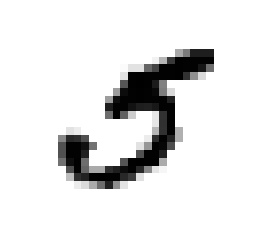

5.0


In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = x[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
print(y[36000]) # true label

In [6]:
x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]

# now shuffle the dataset to guarantee that cv folds will be similar
# but not good for time series data

import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [7]:
'''
Training Binary Classifier
5-detector: 2 classes i.e. 5 and not 5
'''
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [8]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42) # set random_state to get reproducible results
sgd_clf.fit(x_train, y_train_5)
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [9]:
# Implementing Cross-Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

def cv_score(x_train, y_train_5, trian_idx, test_idx, sgd_clf):
    skfold = StratifiedKFold(n_split=3, random_state=42)
    for train_idx, test_idx in skfold.split(x_train, y_train_5):
        clone_clf = clone(sgd_clf)
        x_train_fold = x_train[train_idx]
        y_train_fold = (y_train_5[train_idx])
        x_test_fold = x_train[test_idx]
        y_test_fold = (y_train_5[test_idx])
        clone_clf.fit(x_train_fold, y_train_fold)
        y_pred = clone_clf.predict(x_test_fold)
        n_correct = sum(y_pred == y_test_fold)
        print(n_correct / len(y_pred))

from sklearn.model_selection import cross_val_score
print(cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy"))

[ 0.96305  0.9584   0.94285]


In [10]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self, x):
        return np.zeros((len(x), 1), dtype=bool)
never_5_clf = Never5Classifier()
print(cross_val_score(never_5_clf, x_train, y_train_5, cv=3, scoring="accuracy"))

[ 0.9099   0.90995  0.9091 ]


In [2]:
'''
正確率對分類器來說並不適合
如果skewed的話只要一直都猜"不是5"還可以有90%的正確率
所以要用別的評估績效方法
'''

'''
Confusion Matrix
entry = 把row值誤認為col值的次數
e.g. row=5, col=3, entry=2: 有2次誤把5認為3
'''
from sklearn.model_selection import cross_val_predict
# perform k-fold cv and return pred on each test fold
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_5, y_train_pred))

NameError: name 'sgd_clf' is not defined